In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")

In [55]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [56]:

df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [57]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [58]:
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")
df.columns
print("Number of rows:", len(df))

Number of rows: 6362620


In [59]:
print(df['isFraud'].value_counts())
print(df['isFlaggedFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


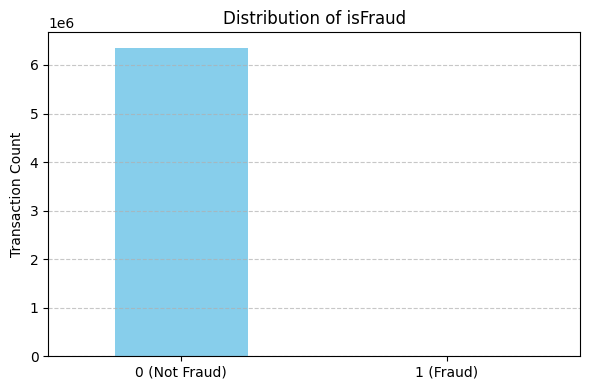

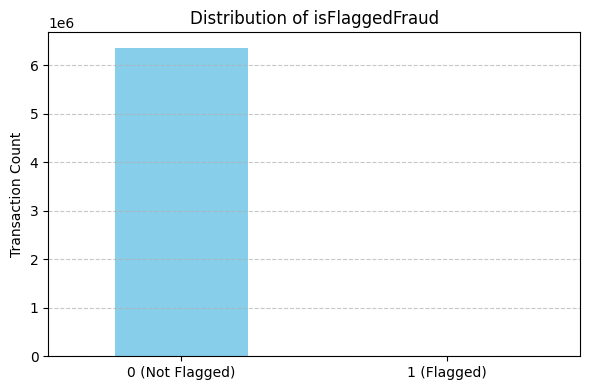

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the counts you found
is_fraud_counts = {'0 (Not Fraud)': 6354407, '1 (Fraud)': 8213}
is_flagged_fraud_counts = {'0 (Not Flagged)': 6362604, '1 (Flagged)': 16}

# Convert to Pandas Series for easy plotting
fraud_df = pd.Series(is_fraud_counts)
flagged_df = pd.Series(is_flagged_fraud_counts)

# Plot isFraud distribution
plt.figure(figsize=(6, 4))
fraud_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of isFraud')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot isFlaggedFraud distribution
plt.figure(figsize=(6, 4))
flagged_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of isFlaggedFraud')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [63]:
df['type'].value_counts()    # For transaction type
df['type'].unique()          # List of all unique types


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [64]:
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"{col} is constant or has only one unique value")


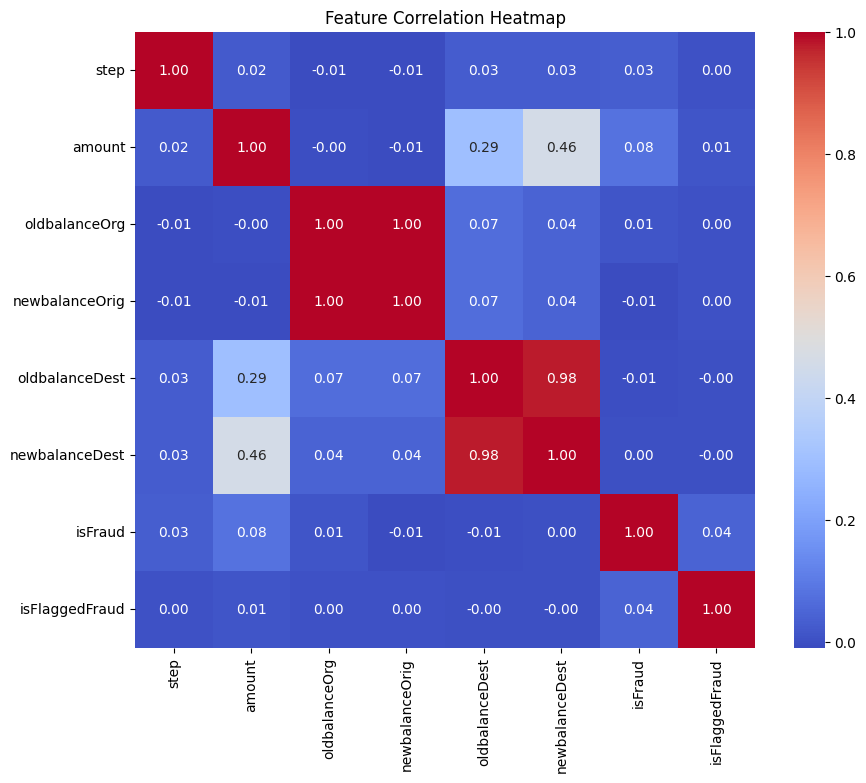

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only on numeric columns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')


,isFraud,isFlaggedFraud,count
0,0,0,6354407
1,1,0,8197
2,1,1,16


In [67]:
df_new = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'])


In [68]:
df_new.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [69]:
df_new.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [70]:
df_new['deltaOrig'] = df_new['oldbalanceOrg'] - df_new['newbalanceOrig']
df_new['deltaDest'] = df_new['newbalanceDest'] - df_new['oldbalanceDest']
df_new['amount_to_orig_ratio'] = df_new['amount'] / (df_new['oldbalanceOrg'] + 1)
df_new['amount_to_dest_ratio'] = df_new['amount'] / (df_new['oldbalanceDest'] + 1)
df_new = pd.get_dummies(df_new, columns=['type'], drop_first=True)


In [71]:
df_new.info()  # check column types and nulls
df_new.head()  # preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   amount                float64
 1   oldbalanceOrg         float64
 2   newbalanceOrig        float64
 3   oldbalanceDest        float64
 4   newbalanceDest        float64
 5   isFraud               int64  
 6   deltaOrig             float64
 7   deltaDest             float64
 8   amount_to_orig_ratio  float64
 9   amount_to_dest_ratio  float64
 10  type_CASH_OUT         bool   
 11  type_DEBIT            bool   
 12  type_PAYMENT          bool   
 13  type_TRANSFER         bool   
dtypes: bool(4), float64(9), int64(1)
memory usage: 509.7 MB


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,deltaOrig,deltaDest,amount_to_orig_ratio,amount_to_dest_ratio,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,0.057834,9839.640000,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,0.087731,1864.280000,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,0.994505,181.000000,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,0.994505,0.008545,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,0.280788,11668.140000,False,False,True,False


In [72]:
print(df_new.columns)


Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'deltaOrig', 'deltaDest',
       'amount_to_orig_ratio', 'amount_to_dest_ratio', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [73]:
#Pyspark Code Implementation